<a href="https://colab.research.google.com/github/SaiDhinakar/cv-intro/blob/main/Camera_calibration_with_circular_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAMERA CALIBRATION WITH CIRCULAR GRID

## IMPORTS

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob

Download image from the web

In [ ]:
!wget  "https://imgs.search.brave.com/ZiyGLgbWxt_gzm6KDjZeD8jpncGsJISR415fwh2PAQc/rs:fit:500:0:1:0/g:ce/aHR0cHM6Ly9hbnN3/ZXJzLm9wZW5jdi5v/cmcvdXBmaWxlcy8x/NDc1NTA5NTY5MzI3/NjcwNS5wbmc" -O "pattern.png"

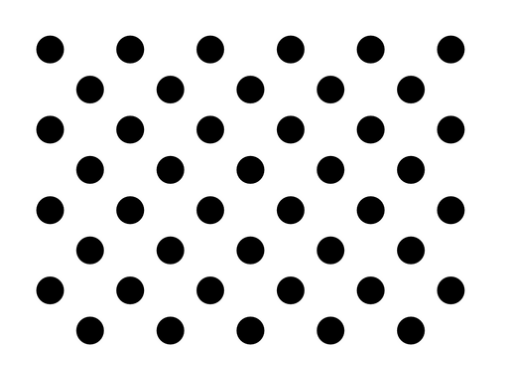

In [27]:
pattern = cv.imread("pattern.png")

plt.imshow(cv.cvtColor(pattern, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Asymmetric circular grid detected


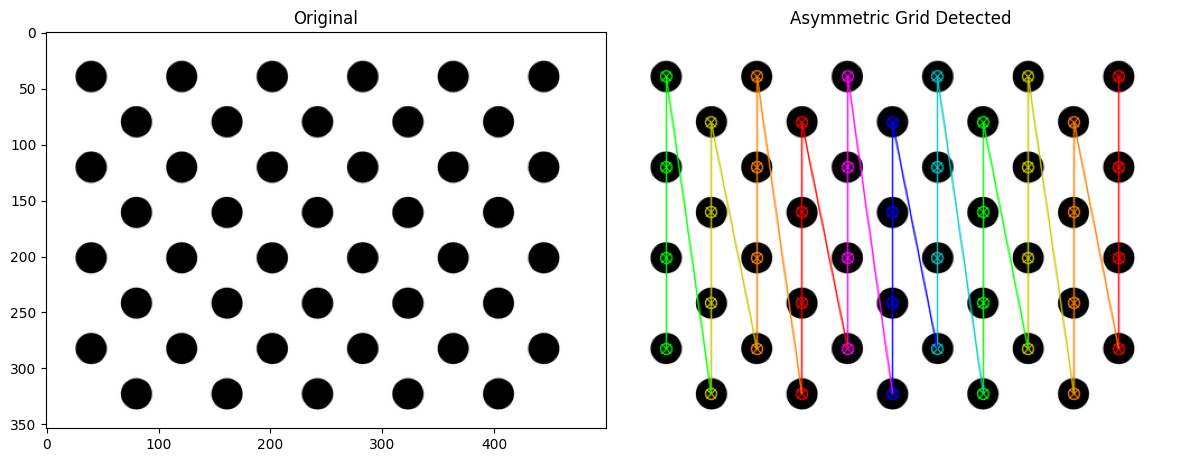

In [22]:
if pattern is None:
    raise FileNotFoundError("Run the above cells to download the pattern image")
gray = cv.cvtColor(pattern, cv.COLOR_BGR2GRAY)

pattern_size = (4, 11)  # rows, cols

ret_sym, centers_sym = cv.findCirclesGrid(gray, pattern_size, flags=cv.CALIB_CB_SYMMETRIC_GRID)
ret_asym, centers_asym = cv.findCirclesGrid(gray, pattern_size, flags=cv.CALIB_CB_ASYMMETRIC_GRID)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1), plt.imshow(cv.cvtColor(pattern, cv.COLOR_BGR2RGB)), plt.title('Original')

if ret_sym:
    vis = cv.drawChessboardCorners(pattern.copy(), pattern_size, centers_sym, ret_sym)
    plt.subplot(1,2,2), plt.imshow(cv.cvtColor(vis, cv.COLOR_BGR2RGB)), plt.title('Symmetric Grid Detected')
    print("Symmetric circular grid detected")
elif ret_asym:
    vis = cv.drawChessboardCorners(pattern.copy(), pattern_size, centers_asym, ret_asym)
    plt.subplot(1,2,2), plt.imshow(cv.cvtColor(vis, cv.COLOR_BGR2RGB)), plt.title('Asymmetric Grid Detected')
    print("Asymmetric circular grid detected")
else:
    plt.subplot(1,2,2), plt.imshow(cv.cvtColor(pattern, cv.COLOR_BGR2RGB)), plt.title('Pattern Not Found')
    print("Pattern not found")
plt.axis('off')
plt.tight_layout()
plt.show()